In [1]:
import numpy as np
import pandas as pd
import math
import os
import pickle
import copy
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
ind_values_i = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/indicators_values_i_up_wb.pkl', 'rb'))
targets_values_i = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/targets_values_i_up_arr_wb.pkl', 'rb'))
goals_values_i = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/goals_values_i_up_arr_wb.pkl', 'rb'))

In [24]:
ind_values_i_dict = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/indicators_values_i_up_wb.pkl', 'rb'))
targets_values_i_dict = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/targets_values_i_up_wb.pkl', 'rb'))
goals_values_i_dict = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/goals_values_i_up_wb.pkl', 'rb'))

In [5]:
# call seriescodes again
info = pd.read_csv('/Users/saravallejomengod/MathsYear4/M4R/utils/wb_info.csv', header=None, dtype=str)
info.drop_duplicates(subset=[2], inplace=True)
print(len(info))

400


In [6]:
targets = list(info[4].unique())
targets.remove('T')

dict_targets = {}

for target in targets:
    t = info[0].where(info[4] == target)

    dict_targets[target] = [i for i in t if str(i) != 'nan']

In [7]:
goals = list(info[3].unique())
goals.remove('T')
dict_goals = {}

for goal in goals:
    g = info[4].where(info[3] == goal)

    dict_goals[goal] = [t for t in g if str(t) != 'nan']
    dict_goals[goal] = list(set(dict_goals[goal]))

In [82]:
dict_goals['4']

['4.1', '4.6', '4.4', '4.5', '4.c', '4.3', '4.2']

In [83]:
dict_targets['4.1']

['SE.COM.DURS',
 'SE.PRM.CMPT.FE.ZS',
 'SE.PRM.CMPT.MA.ZS',
 'SE.PRM.CMPT.ZS',
 'SE.PRM.DURS',
 'SE.PRM.OENR.FE.ZS',
 'SE.PRM.OENR.MA.ZS',
 'SE.PRM.OENR.ZS',
 'SE.PRM.UNER',
 'SE.PRM.UNER.FE',
 'SE.PRM.UNER.FE.ZS',
 'SE.PRM.UNER.MA',
 'SE.PRM.UNER.MA.ZS',
 'SE.PRM.UNER.ZS',
 'SE.SEC.CMPT.LO.FE.ZS',
 'SE.SEC.CMPT.LO.MA.ZS',
 'SE.SEC.CMPT.LO.ZS',
 'SE.SEC.DURS',
 'SE.SEC.UNER.LO.FE.ZS',
 'SE.SEC.UNER.LO.MA.ZS',
 'SE.SEC.UNER.LO.ZS']

In [84]:
dict_targets['4.2']

['SE.PRE.DURS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE', 'SE.PRE.ENRR.MA']

In [88]:
dict_targets['4.6']

['SE.ADT.1524.LT.FE.ZS',
 'SE.ADT.1524.LT.FM.ZS',
 'SE.ADT.1524.LT.MA.ZS',
 'SE.ADT.1524.LT.ZS',
 'SE.ADT.LITR.FE.ZS',
 'SE.ADT.LITR.MA.ZS',
 'SE.ADT.LITR.ZS']

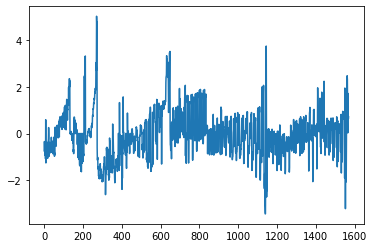

In [211]:
plt.plot(goals_values_i_dict['France'].loc['4'])
plt.show()

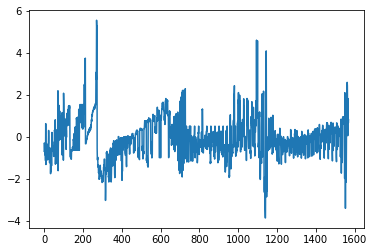

In [212]:
plt.plot(goals_values_i_dict['Spain'].loc['4'])
plt.show()

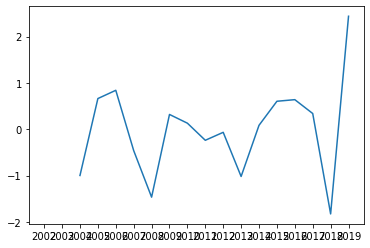

In [34]:
plt.plot(ind_values_i_dict['France'].loc['per_lm_alllm.cov_pop_tot'])
plt.show()

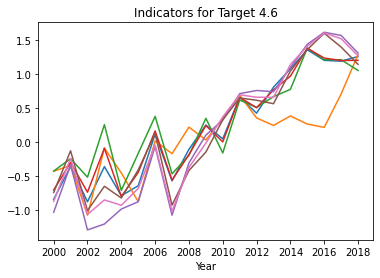

In [91]:
fig, ax = plt.subplots()
for i in dict_targets['4.6']:
    ax.plot(ind_values_i_dict['India'].loc[i])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel("Year")
plt.title("Indicators data for Target 4.6, India")
plt.show()

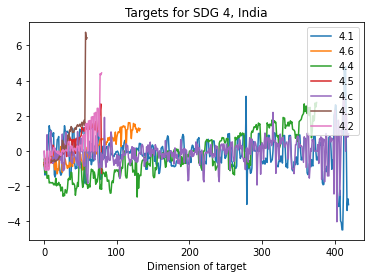

In [99]:
fig, ax = plt.subplots()
for i in dict_goals['4']:
    ax.plot(targets_values_i_dict['India'].loc[i], label=i)
plt.xlabel("Dimension of target")
plt.title("Targets for SDG 4, India")
plt.legend(loc='upper right')
plt.show()

In [152]:
import matplotlib.patches
from matplotlib.patches import ConnectionPatch


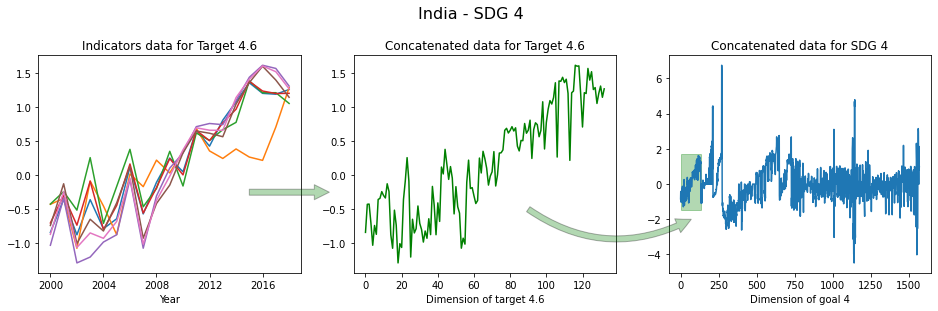

In [209]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
for i in dict_targets['4.6']:
    ax1.plot(ind_values_i_dict['India'].loc[i], label=i)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set(xlabel= "Year", title="Indicators data for Target 4.6")
#ax1.legend(loc='upper left')

ax2.plot(targets_values_i_dict['India'].loc['4.6'], color='g')
ax2.set(xlabel="Dimension of target 4.6", title="Concatenated data for Target 4.6")



ax3.plot(goals_values_i_dict['India'].loc['4'])
ax3.add_patch(matplotlib.patches.Rectangle((0, -1.5), 133., 3.2, alpha=0.3, color="g"))
ax3.set(xlabel="Dimension of goal 4", title="Concatenated data for SDG 4")

con = ConnectionPatch(
    xyA=(90., -0.5), coordsA=ax2.transData,
    xyB=(70., -2.), coordsB=ax3.transData,
    arrowstyle="simple",
    connectionstyle='arc3, rad=0.3', alpha=0.3, fc='g', mutation_scale = 30.)
fig.add_artist(con)

con2 = ConnectionPatch(
    xyA=(15, -0.25), coordsA=ax1.transData,
    xyB=(-20, -0.25), coordsB=ax2.transData,
    arrowstyle="simple",
    connectionstyle='arc3, rad=0.0', alpha=0.3, fc='g', mutation_scale = 30.)
fig.add_artist(con2)

fig.suptitle("India - SDG 4", fontsize=16, y=1.05)
plt.show()

fig.savefig('data_prep.png', bbox_inches='tight')

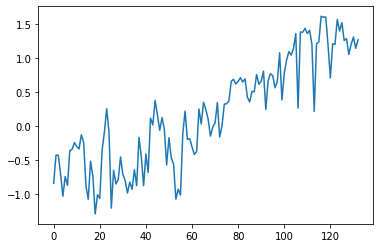

In [139]:
plt.plot(targets_values_i_dict['India'].loc['4.6'])

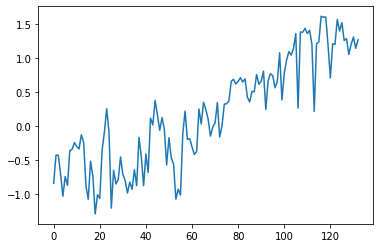

In [140]:
plt.plot(goals_values_i_dict['India'].loc['4'][0:133])